In [56]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster

In [45]:
df = pd.read_csv('data/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [48]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [49]:
cycle_dict = {"Contract": {"Month-to-month": 1, "One year": 12, "Two year": 24},
              "Churn": {"No": 0, "Yes": 1}}
df.replace(cycle_dict, inplace=True)

In [50]:
df.head()
type(df)

cycle_dict = {"Contract": {"Month-to-month": 1, "One year": 12, "Two year": 24},
              "Churn": {"No": 0, "Yes": 1}}

df.replace(cycle_dict, inplace=True)

df["Cycles"] = df["tenure"]/df["Contract"]

In [51]:
df_fix = df[["tenure","Cycles","MonthlyCharges","Churn"]]

In [52]:
df_fix.head()

,tenure,Cycles,MonthlyCharges,Churn
0,1,1.000000,29.85,0
1,34,2.833333,56.95,0
2,2,2.000000,53.85,1
3,45,3.750000,42.30,0
4,2,2.000000,70.70,1


In [53]:
rank_df = df_fix.rank(method='first')

In [54]:
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head(10)

,tenure,Cycles,MonthlyCharges,Churn
0,-1.726272,-1.611679,-0.922646,-1.731682
1,0.156397,-0.582801,-0.366894,-1.731190
2,-1.424789,-1.084453,-0.502635,0.812971
3,0.499684,-0.025574,-0.802643,-1.730698
4,-1.424297,-1.083961,0.024099,0.813463
5,-0.938876,0.576899,1.264949,0.813954
6,-0.285253,1.086420,0.805594,-1.730207
7,-0.819856,0.678213,-0.926580,-1.729715
8,-0.039837,1.237899,1.464134,0.814446
9,1.077567,0.335418,-0.387551,-1.729223


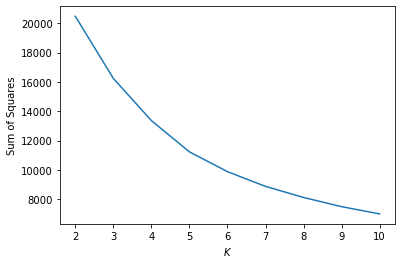

In [57]:
sse = []
krange = list(range(2,11))
X = normalized_df.values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=3)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    sse.append(np.sum((X - centers[cluster_assignments]) ** 2))

plt.plot(krange, sse)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")
plt.show()

In [125]:
# Use silhouette coefficient to determine the best number of clusters
from sklearn.metrics import silhouette_score

for n_cluster in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df)
    
    silhouette_avg = silhouette_score(
        normalized_df, 
        kmeans.labels_)
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.2505
Silhouette Score for 3 Clusters: 0.2497
Silhouette Score for 4 Clusters: 0.2601
Silhouette Score for 5 Clusters: 0.2890
Silhouette Score for 6 Clusters: 0.2850
Silhouette Score for 7 Clusters: 0.2850
Silhouette Score for 8 Clusters: 0.2858


In [62]:
kmeans = KMeans(n_clusters=5).fit(normalized_df)

five_cluster_df = normalized_df.copy(deep=True)
five_cluster_df['Cluster'] = kmeans.labels_

five_cluster_df.head(10)

,tenure,Cycles,MonthlyCharges,Churn,Cluster
0,-1.726272,-1.611679,-0.922646,-1.731682,3
1,0.156397,-0.582801,-0.366894,-1.731190,4
2,-1.424789,-1.084453,-0.502635,0.812971,3
3,0.499684,-0.025574,-0.802643,-1.730698,4
4,-1.424297,-1.083961,0.024099,0.813463,3
5,-0.938876,0.576899,1.264949,0.813954,2
6,-0.285253,1.086420,0.805594,-1.730207,1
7,-0.819856,0.678213,-0.926580,-1.729715,1
8,-0.039837,1.237899,1.464134,0.814446,2
9,1.077567,0.335418,-0.387551,-1.729223,4


In [85]:
five_cluster_df.groupby('Cluster').agg({
    'Cycles':'mean',
    'MonthlyCharges':'mean',
    'tenure':'mean',
    'Churn':'mean'}).round(2)

fdf = five_cluster_df.rename(columns={"tenure": "Tenure", "Churn": "ZChurn"})

In [86]:
df_nor_melt = pd.melt(fdf.reset_index(),
                     id_vars = ['Cluster'],
                     value_vars = ["Tenure","Cycles","MonthlyCharges","ZChurn"],
                     var_name = 'Attribute',
                     value_name = 'Value')

([<matplotlib.axis.XTick at 0x239cd13fa30>,
 [Text(0, 0, 'Cycles'),
  Text(0, 0, 'Monthly Charge'),
  Text(0, 0, 'Tenure'),
  Text(0, 0, 'Churn')])

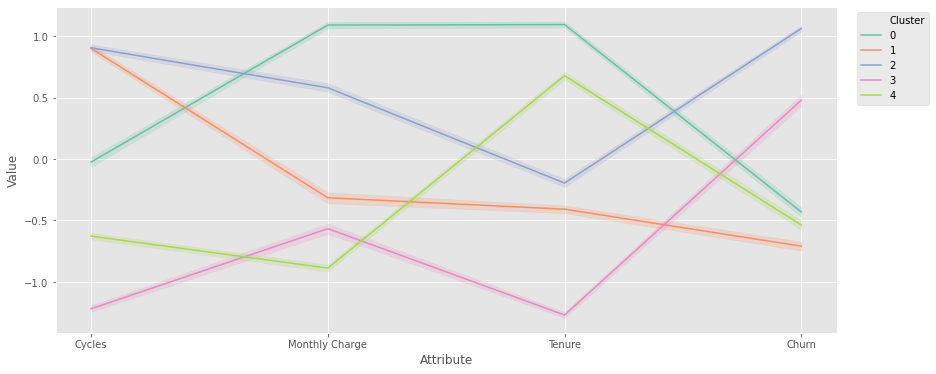

In [128]:
plt.figure(figsize=(14,6))
# plt.style.use('ggplot')
sns.lineplot('Attribute', 'Value', palette = "Set2",hue='Cluster', data=df_nor_melt)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks([0,1,2,3],['Cycles', 'Monthly Charge', 'Tenure', 'Churn'])


In [105]:
cluster1_metrics = kmeans.cluster_centers_[0]
cluster2_metrics = kmeans.cluster_centers_[1]
cluster3_metrics = kmeans.cluster_centers_[2]
cluster4_metrics = kmeans.cluster_centers_[3]
cluster5_metrics = kmeans.cluster_centers_[4]

In [106]:
data = [cluster1_metrics, cluster2_metrics, cluster3_metrics, cluster4_metrics]
cluster_center_df = pd.DataFrame(data)

In [109]:
cluster_center_df.columns = five_cluster_df.columns[0:4]
cluster_center_df

,tenure,Cycles,MonthlyCharges,Churn
0,1.090775,-0.022708,1.090177,-0.433414
1,-0.409175,0.898866,-0.318961,-0.708706
2,-0.193843,0.904143,0.579657,1.061188
3,-1.269716,-1.217971,-0.565897,0.478382


In [110]:
df['Cluster'] = kmeans.labels_

In [111]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cycles,Cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,1,Yes,Electronic check,29.85,29.85,0,1.000000,3
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,12,No,Mailed check,56.95,1889.5,0,2.833333,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,1,Yes,Mailed check,53.85,108.15,1,2.000000,3
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,12,No,Bank transfer (automatic),42.30,1840.75,0,3.750000,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,1,Yes,Electronic check,70.70,151.65,1,2.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,12,Yes,Mailed check,84.80,1990.5,0,2.000000,3
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,12,Yes,Credit card (automatic),103.20,7362.9,0,6.000000,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,1,Yes,Electronic check,29.60,346.45,0,11.000000,2
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,1,Yes,Mailed check,74.40,306.6,1,4.000000,2


In [116]:
cluster_0 = df[df["Cluster"] == 0]
cluster_1 = df[df["Cluster"] == 1]
cluster_2 = df[df["Cluster"] == 2]
cluster_3 = df[df["Cluster"] == 3]
cluster_4 = df[df["Cluster"] == 4]

In [117]:
cluster_0.describe()

,SeniorCitizen,tenure,Contract,MonthlyCharges,Churn,Cycles,Cluster
count,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.0
mean,0.189533,60.275106,16.714993,96.156259,0.044554,9.392327,0.0
std,0.392070,12.152836,7.972358,12.348427,0.206396,16.640932,0.0
min,0.000000,15.000000,1.000000,60.350000,0.000000,1.000000,0.0
25%,0.000000,53.000000,12.000000,85.950000,0.000000,2.875000,0.0
50%,0.000000,64.000000,12.000000,97.750000,0.000000,3.000000,0.0
75%,0.000000,71.000000,24.000000,106.050000,0.000000,5.166667,0.0
max,1.000000,72.000000,24.000000,118.750000,1.000000,72.000000,0.0
